ERSIP Lab Sessions    
Lab 1  
20-09-2025

In [2]:
# load image
import rasterio

src = rasterio.open("spot2005_pansharpened_utm33_subset_NIRRGMIR.tif")

In [3]:
# image properties
array = src.read(1)

# Properties
print("Dimensions:", array.shape)
print("# bands:", src.count)
print("Resolution:", src.res)
print("Data type:", src.dtypes[0])


Dimensions: (642, 830)
# bands: 4
Resolution: (5.29309099999997, 5.29309099999973)
Data type: uint8


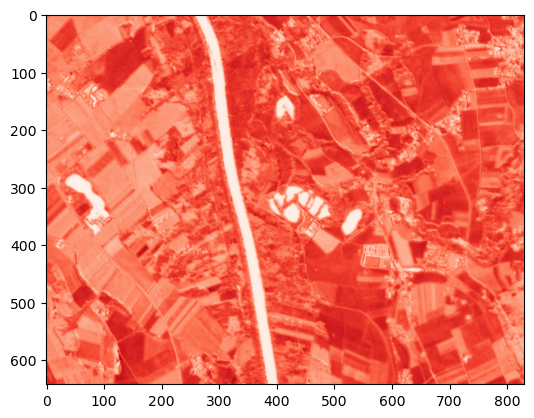

In [5]:
# display image
from matplotlib import pyplot

pyplot.imshow(array, cmap='Reds')
pyplot.show()  

Dimension : (161, 208)
~ resolution: (21.17236399999988, 21.17236399999892)
Data type: uint8


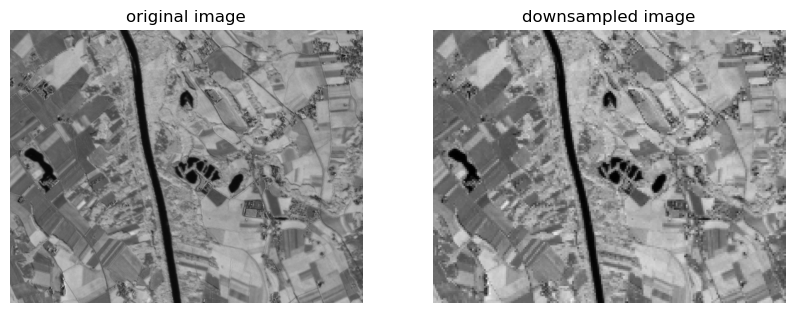

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Original image shape
[m, n] = array.shape

# Downsampling rate 
dsr = 4

# Reduce spatial resolution by selecting every dsr-th pixel in both rows and columns
src2 = array[::dsr, ::dsr]

# downsample image properties
print('Dimension :', src2.shape)
print('~ resolution:', tuple(res*dsr for res in src.res)) #original resoultion*downsampling rate
print('Data type:', src.dtypes[0])

# Display the downsampled image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(array, cmap='gray')
axes[0].set_title("original image")
axes[0].axis("off")

axes[1].imshow(src2, cmap='gray')
axes[1].set_title("downsampled image")
axes[1].axis("off")
plt.show()


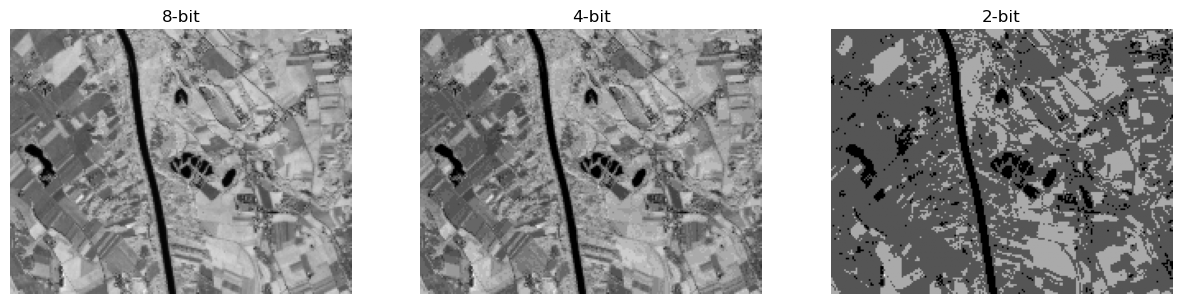

In [8]:
# Reduce Radiometric Resolution
# Normalize/rescale 
src_8bit = ((src2 - src2.min()) / (src2.max() - src2.min()) * 255).astype(np.uint8) # 8-bit (0-255)
src_4bit = ((src2 - src2.min()) / (src2.max() - src2.min()) * 15).astype(np.uint8) # 4-bit (0-15)
src_2bit = ((src2 - src2.min()) / (src2.max() - src2.min()) * 3).astype(np.uint8) # 2-bit (0-3)

# print("Data type:", src_8bit.dtype)

# Display radiometric reduced image
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(src_8bit, cmap='gray')
axes[0].set_title("8-bit")
axes[0].axis("off")

axes[1].imshow(src_4bit, cmap='gray')
axes[1].set_title("4-bit")
axes[1].axis("off")

axes[2].imshow(src_2bit, cmap='gray')
axes[2].set_title("2-bit")
axes[2].axis("off")

plt.show()


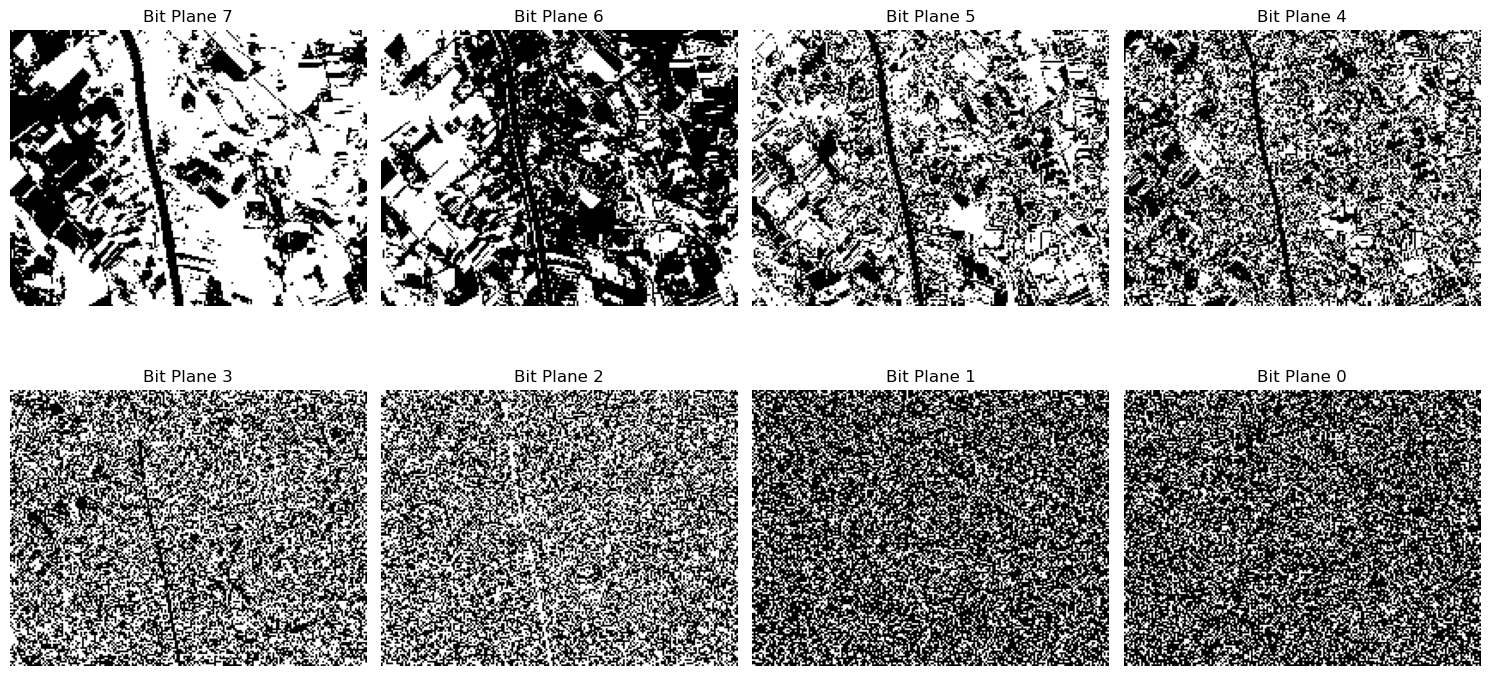

In [13]:
# Bit plane slicing
# Extract each bit plane (using the 8bit image)
# >> i bitwise right shift by i positions; bitwise & 1 isolates the least signinficant bit (LSB) after the shift.
bit_planes = [(src_8bit >> i) & 1 for i in range(8)] 

# Display bit planes    
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Display bit planes 
for i, ax in enumerate(axes.flatten()):
    ax.imshow(bit_planes[7-i], cmap='gray')
    ax.set_title(f"Bit Plane {7-i}")
    ax.axis("off")

plt.tight_layout()
plt.show()
